In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import networkx as nx

/Users/pablovalganon/Library/Python/3.9/lib/python/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
#PROYECCION BOGOTÁ
EPSG = 'EPSG:21897'

In [3]:
ZAT_index = pd.read_csv("bogota/zat_index.txt", sep=" ", header=None, names=["ZAT", "index"])
ZAT = gpd.read_file("bogota/ZAT/ZAT.shp")[['ZAT', 'geometry']].to_crs(EPSG)
ZAT = ZAT.merge(ZAT_index, on="ZAT")

In [4]:
chosenLinks = pd.read_csv("800_bogota.txt", sep = "\t", header = None, names = ['i_index', 'j_index', 'population'])

# Get the ZAT of each link

chosenLinksZAT = pd.merge(
    chosenLinks, ZAT_index, left_on = 'i_index', right_on = 'index', how = 'left').merge(
    ZAT_index, left_on = 'j_index', right_on = 'index', how = 'left')[['ZAT_x', 'ZAT_y', 'population']].rename(columns={'ZAT_x': 'i_ZAT', 'ZAT_y': 'j_ZAT'})

In [5]:
graph = nx.from_pandas_edgelist(chosenLinksZAT, source='i_ZAT', target='j_ZAT', edge_attr=['population'], create_using=nx.DiGraph).to_directed()

centroids = pd.DataFrame(data={'x':ZAT.centroid.x, 'y':ZAT.centroid.y})
centroids.index = ZAT['ZAT']
centroids = centroids.apply(list, axis=1)

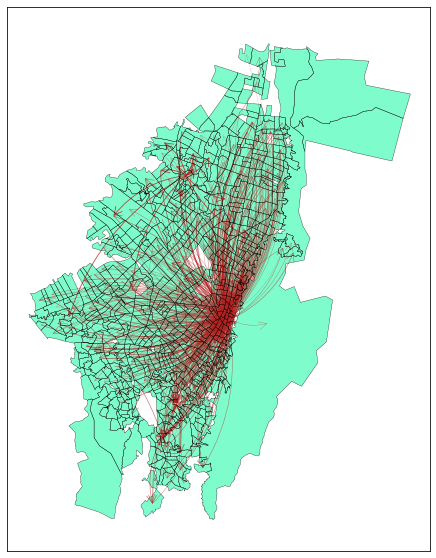

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ZAT.plot(ax=ax, color='mediumspringgreen', linewidth=0, alpha=0.5)
ZAT.boundary.plot(ax=ax, color='black', linewidth=0.3, alpha=1)

graph.remove_edges_from(nx.selfloop_edges(graph))

strength = np.array([graph.edges[e]['population'] for e in graph.edges])
nx.draw_networkx(graph, pos=centroids, ax=ax, arrows=True, arrowsize=20, width=np.power(strength/2000, 1/5), node_size=0, edge_color='firebrick',
    with_labels=False, arrowstyle='->', connectionstyle='arc3,rad=0.2', alpha=np.power(strength/strength.max(),1/10));

plt.savefig('links_map.png', dpi=300, bbox_inches='tight')

In [90]:
#example dataframe with two columns
centroid_prueba = pd.DataFrame(data=[[0,0], [1,1]], index=[1,2]).apply(list, axis=1)

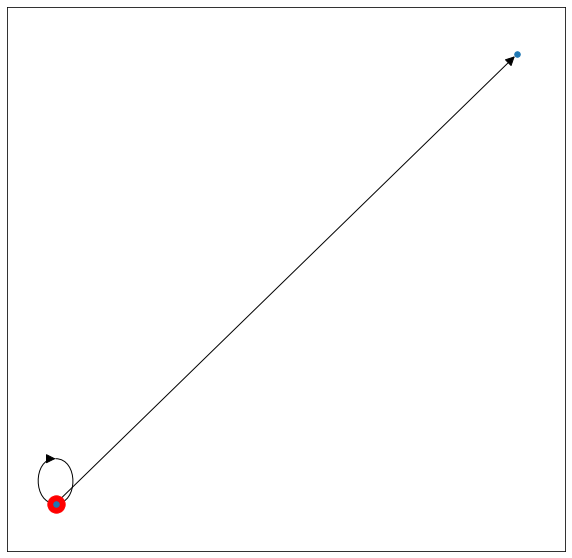

In [91]:
fig,ax = plt.subplots(figsize=(10,10))
graph_prueba = nx.from_edgelist([(1,1),(1,2)], create_using=nx.DiGraph).to_directed()
nx.draw_networkx(graph_prueba, pos=centroid_prueba, ax=ax, arrows=True, arrowsize=20, node_size=30, with_labels=False)
ax.scatter(0,0, s=300, c='r', marker='o')